In [1]:
remotes::install_github("peeter-t2/digar.txts",lib="R_pckg/",upgrade="never")
library(digar.txts,lib.loc="R_pckg/")

* checking for file ‘/tmp/RtmpER9o4a/remotes1e64945259493/peeter-t2-digar.txts-b87e10a/DESCRIPTION’ ... OK
* preparing ‘digar.txts’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘digar.txts_0.0.0.9100.tar.gz’
Warning in sprintf(gettext(fmt, domain = domain), ...) :
  one argument not used by format 'invalid uid value replaced by that for user 'nobody''



Loading required package: data.table



In [2]:
library(tidyverse)
install.packages('tidytext', lib='~/R_pckg')
library(tidytext, lib.loc='~/R_pckg')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [3]:
all_issues <- get_digar_overview()

[1] "Issue metadata read"


In [4]:
rootsi_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [5]:
searchterm <- "balti"
searchfile <- "balti_lemmas_rootsi.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed, searchtype="lemmas", source="pages")

In [6]:
texts <- fread("balti_lemmas_rootsi.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta <- texts %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [7]:
rootsi_aastad_balti <- fileids_w_meta %>% 
  count(year) %>% mutate(set="balti")

In [9]:
subset_meta <- get_subset_meta(rootsi_ajalehed, source="pages")

In [11]:
subset_wordcounts <- subset_meta %>% 
  group_by(year) %>% 
  summarise(words=sum(PageTextWordCount))

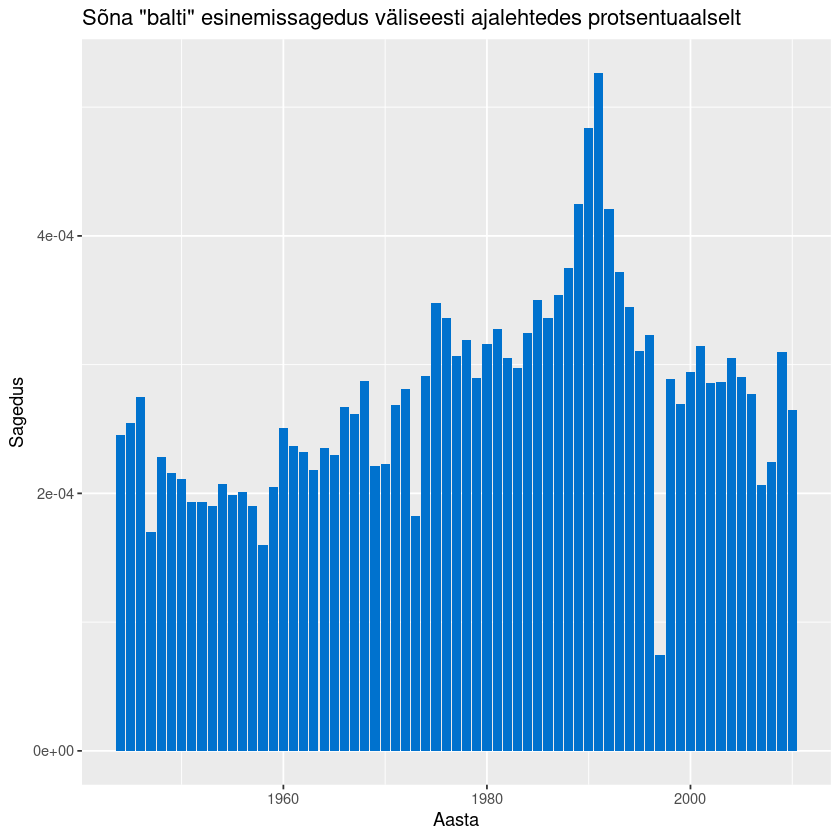

In [18]:
rootsi_aastad_balti %>% 
  left_join(subset_wordcounts,by="year") %>% 
  ggplot(aes(x=year,y=n/words))+
  geom_bar(stat = "identity", fill = "#0072CE") +
  labs(x = "Aasta",
       y = "Sagedus",
       title = 'Sõna "balti" esinemissagedus väliseesti ajalehtedes protsentuaalselt')

In [19]:
rootsi_ajalehed1 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1943&year<1961) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [20]:
searchterm <- "balti"
searchfile <- "balti_lemmas_rootsi1.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed1, searchtype="lemmas", source="pages")

In [21]:
texts <- fread("balti_lemmas_rootsi1.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta1 <- texts %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed1 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [22]:
balti_concs_rootsi1 <- get_concordances(searchterm=searchterm,texts=texts,before=50,after=50,txt="lemmas",id="id")

In [39]:
balti_concs1 <- balti_concs_rootsi1[, !c("id","nr","begin","end", "DocumentID")]

write.table(balti_concs1, "balti_concs1.txt", sep="\t", quote = F, row.names = F)

In [23]:
balti_trigrammid_rootsi1 <- balti_concs_rootsi1 %>% 
  unnest_tokens(word, context, token = "ngrams", n = 3, n_min = 3) %>% 
  count(word,sort=T)

In [24]:
head(balti_trigrammid_rootsi1, 20)

word,n
<chr>,<int>
kolm balti riik,294
teine balti riik,288
ja teine balti,273
liidu liidud liit,250
eesti ja teine,195
balti humanist ühing,183
n liidu liidud,178
ka balti riik,176
balti riik ja,166


In [25]:
rootsi_ajalehed2 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1960&year<1985) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [26]:
searchterm <- "balti"
searchfile <- "balti_lemmas_rootsi2.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed2, searchtype="lemmas", source="pages")

In [27]:
texts <- fread("balti_lemmas_rootsi2.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta1 <- texts %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed2 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [28]:
balti_concs_rootsi2 <- get_concordances(searchterm=searchterm,texts=texts,before=50,after=50,txt="lemmas",id="id")

In [40]:
balti_concs2 <- balti_concs_rootsi2[, !c("id","nr","begin","end", "DocumentID")]

write.table(balti_concs2, "balti_concs2.txt", sep="\t", quote = F, row.names = F)

In [29]:
balti_trigrammid_rootsi2 <- balti_concs_rootsi2 %>% 
  unnest_tokens(word, context, token = "ngrams", n = 3, n_min = 3) %>% 
  count(word,sort=T)

In [30]:
head(balti_trigrammid_rootsi2, 20)

word,n
<chr>,<int>
de baltiska baltiskas,766
baltiska baltiskas staterna,376
ja teine balti,370
balti riik küsimus,362
liidu liidud liit,359
teine balti riik,326
n liidu liidud,301
eesti ja teine,291
kolm balti riik,258


In [31]:
rootsi_ajalehed3 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1984&year<1996) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [32]:
searchterm <- "balti"
searchfile <- "balti_lemmas_rootsi3.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed3, searchtype="lemmas", source="pages")

In [33]:
texts <- fread("balti_lemmas_rootsi3.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta1 <- texts %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed3 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [34]:
balti_concs_rootsi3 <- get_concordances(searchterm=searchterm,texts=texts,before=50,after=50,txt="lemmas",id="id")

In [41]:
balti_concs3 <- balti_concs_rootsi3[, !c("id","nr","begin","end", "DocumentID")]

write.table(balti_concs3, "balti_concs3.txt", sep="\t", quote = F, row.names = F)

In [35]:
balti_trigrammid_rootsi3 <- balti_concs_rootsi3 %>% 
  unnest_tokens(word, context, token = "ngrams", n = 3, n_min = 3) %>% 
  count(word,sort=T)

In [36]:
head(balti_trigrammid_rootsi3, 20)

word,n
<chr>,<int>
de baltiska baltiskas,346
kolm balti riik,233
teine balti riik,186
liidu liidud liit,174
ja teine balti,155
baltiska baltiskas staterna,152
balti riik iseseisvus,132
et balti riik,126
balti riik ja,123
